# [CNN CUSTOM DATASET + MODEL]

- 사용자 정의 이미지 데이터셋 생성 => imageFolder
- 사용자 정의 기반 CNN 기본 모델
- 데이터: 강아지 고양이 사진

In [30]:
# 모듈 로딩

import torch
import torch.nn as nn
import torch.nn.functional as F


from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.transforms import transforms

import matplotlib.pyplot as plt

In [31]:
# 데이터준비
IMG_ROOT = '../cat_dog/'


[2] 데이터 로딩 및 데이터셋 준비 <hr>

In [32]:
# [2-0] 이미지 전처리 및 변형
# - resize => 이미지 크기 통일					=> transforms.Resize((shape))
# - tensor 화 => Pytorch 모델 입력 타입			=> transforms.ToTensor() : 텐서화 + 정규화 

preprocessing = transforms.Compose(
	[ transforms.Resize((100,100)), transforms.ToTensor()]
)

In [33]:
# 이미지 데이터셋 확인
imgDS = ImageFolder(root=IMG_ROOT, transform=preprocessing)

In [34]:
print(f'classe => {imgDS.classes}')
print(f'class_to_idx => {imgDS.class_to_idx}')
print(f'targets => {imgDS.targets}')
print(f'imgs => {imgDS.imgs}')
print(f'{imgDS[0]}')

classe => ['cat', 'dog']
class_to_idx => {'cat': 0, 'dog': 1}
targets => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<class 'torch.Tensor'> tensor(0.0039) tensor(0.9961)


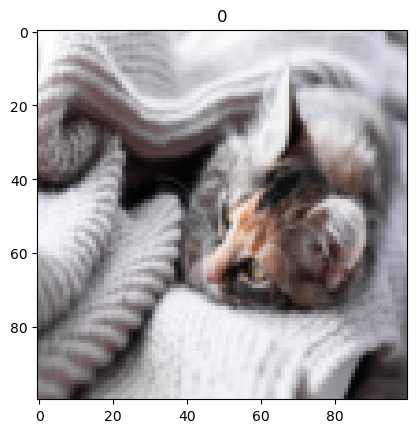

In [35]:
# 내부적으로 __getiem__() 호출되면서 이미지 데이터와 타겟 반환
rawImg, target = imgDS[0]

print(type(rawImg), rawImg.min(), rawImg.max())
plt.imshow(rawImg.permute(1,2,0))
plt.title(target)
plt.show()


In [36]:
from PIL import Image

imgDL = DataLoader(imgDS)
for img,target in imgDL:
	print(img.shape, target)
	break

torch.Size([1, 3, 100, 100]) tensor([0])
